In [ ]:
!python -m pip install python-igraph
!pip install leidenalg igraph pandas networkx



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import leidenalg as la
from collections import Counter
import numpy as np
import networkx as nx
from collections import Counter


In [ ]:
# Bước 1: đọc GraphML bằng NetworkX
G_nx = nx.read_gml("D:/du lieu o cu/HUTECH Courses/Social Networking Course/SocialNetworkingProject/Project của Đạt/social_network.gml")

In [ ]:
print(G_nx.number_of_nodes())
print(G_nx.number_of_edges())

60191
130776


In [ ]:
# Tìm các node treo
isolates = list(nx.isolates(G_nx))

# Loại bỏ các node treo
G_nx.remove_nodes_from(isolates)

# Độ đo trung tâm

In [ ]:
import pandas as pd
import networkx as nx

class VnExpressBasic:
    def __init__(self, graph):
        self.graph = graph

    def average_degree(self):
        # Tính trung bình của tổng in_degree và out_degree
        in_degree_sum = sum(dict(self.graph.in_degree()).values())
        out_degree_sum = sum(dict(self.graph.out_degree()).values())
        num_nodes = len(self.graph.nodes())
        return (in_degree_sum + out_degree_sum) / num_nodes

    def graph_density(self):
        # Tính mật độ cho đồ thị có hướng
        num_edges = self.graph.number_of_edges()
        num_nodes = len(self.graph.nodes())
        max_edges = num_nodes * (num_nodes - 1)
        return num_edges / max_edges

    def average_path_length(self):
        # Tính độ dài trung bình của các đường đi trong đồ thị
        try:
            if nx.is_strongly_connected(self.graph):
                return nx.average_shortest_path_length(self.graph)
            else:
                return float('inf')  # Trả về vô hạn nếu đồ thị không mạnh liên thông
        except nx.NetworkXError:
            return float('inf')

    def network_diameter(self):
        # Tính đường kính cho đồ thị có hướng
        try:
            if nx.is_strongly_connected(self.graph):
                return nx.diameter(self.graph)
            else:
                return float('inf')  # Trả về vô hạn nếu đồ thị không mạnh liên thông
        except nx.NetworkXError:
            return float('inf')


# Khởi tạo đối tượng VnExpressBasic và tính các chỉ số
vnexpress = VnExpressBasic(G)

average_degree = vnexpress.average_degree()
graph_density = vnexpress.graph_density()
average_path_length = vnexpress.average_path_length()
network_diameter = vnexpress.network_diameter()

# Tạo DataFrame chứa các chỉ số
data = {
    "Metric": ["Average Degree", "Graph Density", "Average Path Length", "Network Diameter"],
    "Value": [average_degree, graph_density, average_path_length, network_diameter]
}
df = pd.DataFrame(data)

# Lưu DataFrame dưới dạng tệp Excel
file_name = "Average_calculate_directed.xlsx"
df.to_excel(file_name, index=False, engine='openpyxl')

print(f"File saved as {file_name}.")


In [ ]:
import networkx as nx
import pandas as pd

# Lớp kế thừa để tính các độ đo trung tâm
class VnExpressCen:
    def __init__(self, graph):
        self.graph = graph

    def in_degree_centrality(self):
        return nx.in_degree_centrality(self.graph)

    def out_degree_centrality(self):
        return nx.out_degree_centrality(self.graph)

    def betweenness_centrality(self):
        return nx.betweenness_centrality(self.graph, normalized=True)

    def closeness_centrality(self):
        return nx.closeness_centrality(self.graph)



# Khởi tạo đối tượng và tính các độ đo trung tâm
vnexpress_cen = VnExpressCen(G)

in_degree_centrality = vnexpress_cen.in_degree_centrality()
out_degree_centrality = vnexpress_cen.out_degree_centrality()
betweenness_centrality = vnexpress_cen.betweenness_centrality()
closeness_centrality = vnexpress_cen.closeness_centrality()

# Tạo DataFrame từ các độ đo trung tâm
df_centrality = pd.DataFrame({
    "Node": list(in_degree_centrality.keys()),
    "In-Degree Centrality": list(in_degree_centrality.values()),
    "Out-Degree Centrality": list(out_degree_centrality.values()),
    "Betweenness Centrality": list(betweenness_centrality.values()),
    "Closeness Centrality": list(closeness_centrality.values()),
})

# Lưu DataFrame dưới dạng tệp Excel
file_name_centrality = "Node_Centralities_Directed.xlsx"
df_centrality.to_excel(file_name_centrality, index=False, engine='openpyxl')

print(f"File saved as {file_name_centrality}.")


# Phân cụm

In [ ]:
########################################################################
# 1) Infomap (community_infomap)
########################################################################
import igraph as ig

print("\nChạy Infomap...")
# Chuyển đổi đồ thị NetworkX thành đồ thị igraph
G_ig = ig.Graph.from_networkx(G_nx)
# Sử dụng community_infomap từ igraph
infomap_partition = G_ig.community_infomap()
# Tính modularity
mod_infomap = G_ig.modularity(infomap_partition.membership)
print("Infomap - Number of communities:", len(infomap_partition))
print("Infomap - Directed modularity:", mod_infomap)



Chạy Infomap...
Infomap - Number of communities: 2223
Infomap - Directed modularity: 0.4532547892640319


In [ ]:
########################################################################
# 2) Walktrap (community_walktrap)
########################################################################
print("\nChạy Walktrap...")
# Chuyển đổi đồ thị NetworkX thành đồ thị igraph
G_ig = ig.Graph.from_networkx(G_nx)
# Walktrap trả về một object "VertexDendrogram", cần cắt về partition:
walktrap_dendrogram = G_ig.community_walktrap()
walktrap_partition = walktrap_dendrogram.as_clustering()
# Tính modularity
mod_walktrap = G_ig.modularity(walktrap_partition.membership)
print("Walktrap - Number of communities:", len(walktrap_partition))
print("Walktrap - Directed modularity:", mod_walktrap)



Chạy Walktrap...


MemoryError: Error at src/community/walktrap/walktrap.cpp:206: bad allocation. -- Out of memory

In [ ]:
########################################################################
# 3) Louvain (Multilevel) - community_multilevel
########################################################################
print("\nChạy Louvain (Multilevel)...")
# Chuyển đổi đồ thị NetworkX thành đồ thị igraph
G_ig = ig.Graph.from_networkx(G_nx)

# Chuyển đổi đồ thị có hướng thành không hướng
G_ig_undirected = G_ig.as_undirected()

# Chạy Louvain trên đồ thị không hướng
louvain_partition = G_ig_undirected.community_multilevel()
mod_louvain = G_ig_undirected.modularity(louvain_partition.membership)
print("Louvain - Number of communities:", len(louvain_partition))
print("Louvain - Directed modularity:", mod_louvain)



Chạy Louvain (Multilevel)...
Louvain - Number of communities: 51
Louvain - Directed modularity: 0.5235488393518174


In [ ]:
########################################################################
# 4) Label Propagation (community_label_propagation)
########################################################################
print("\nChạy Label Propagation...")
# Chạy Label Propagation trên đồ thị không hướng
label_partition = G_ig_undirected.community_label_propagation()
mod_label = G_ig_undirected.modularity(label_partition.membership)
print("Label Propagation - Number of communities:", len(label_partition))
print("Label Propagation - Modularity:", mod_label)



Chạy Label Propagation...
Label Propagation - Number of communities: 430
Label Propagation - Modularity: 0.48532799914044245


In [ ]:
########################################################################
# Tóm tắt
########################################################################
print("\nTóm tắt số cộng đồng:")
print("Infomap - Number of communities:", len(infomap_partition))
print("Walktrap - Number of communities:", len(walktrap_partition))
print("Louvain - Number of communities:", len(louvain_partition))
print("Label Propagation - Number of communities:", len(label_partition))
print("\nDirected modularity:")
print("Infomap:", mod_infomap)
print("Walktrap:", mod_walktrap)
print("Louvain:", mod_louvain)
print("Label Propagation:", mod_label)



Tóm tắt số cộng đồng:
Infomap - Number of communities: 2223


NameError: name 'walktrap_partition' is not defined

In [ ]:
# Giả sử bạn đã có đồ thị G_nx là đồ thị NetworkX có hướng
# Chuyển đổi đồ thị có hướng của NetworkX thành đồ thị không hướng của igraph
G_igraph = ig.Graph.from_networkx(G_nx.to_undirected())

# Chạy thuật toán Leiden để phân cộng đồng
partition = la.find_partition(G_igraph, la.ModularityVertexPartition)

# Lấy kết quả phân cụm (cộng đồng) từ thuật toán Leiden
community_labels = partition.membership

# Lưu kết quả phân cụm vào DataFrame
df = pd.DataFrame(list(G_nx.nodes(data=True)), columns=['node', 'attributes'])
df['community'] = community_labels  # Thêm cột cộng đồng

# # Lưu kết quả vào tệp Excel
# output_file_path = 'leiden_results.xlsx'
# df.to_excel(output_file_path, index=False)

# print(f"Đã lưu kết quả phân cộng đồng vào {output_file_path}")

# Tính số lượng cộng đồng
num_communities = len(set(community_labels))
print(f"Số lượng cộng đồng: {num_communities}")

# In ra giá trị modularity
modularity_value = partition.modularity
print(f"Giá trị modularity: {modularity_value:.4f}")

# In ra số lượng node trong mỗi cộng đồng
community_sizes = df['community'].value_counts()
print("Số lượng node trong mỗi cộng đồng:")
print(community_sizes)


Số lượng cộng đồng: 45
Giá trị modularity: 0.5395
Số lượng node trong mỗi cộng đồng:
community
0     9379
1     5930
2     3708
3     3026
4     2732
5     2725
6     1976
7     1955
8     1702
9     1467
10    1423
11    1278
12    1195
13    1110
14    1108
15    1089
16    1048
17     993
18     980
19     973
20     890
21     889
22     888
23     859
24     856
25     814
26     792
27     715
28     706
29     703
30     676
31     651
32     640
33     589
34     579
35     579
36     548
37     516
38     508
39     488
40     451
41       3
43       2
42       2
44       2
Name: count, dtype: int64


In [ ]:
df.to_excel('D:/du lieu o cu/HUTECH Courses/Social Networking Course/SocialNetworkingProject/Project của Đạt/social_network_leiden.xlsx', index=False)

In [ ]:
community_sizes = df['community'].value_counts()
print("Kích thước của từng cụm:")
print(community_sizes)


Kích thước của từng cụm:
community
0     6899
1     6507
2     3358
4     1250
3     1250
5     1170
6     1104
7     1033
8     1003
9     1002
10    1000
11     912
12     799
13     781
14     762
15     725
16     723
17     706
18     645
19     630
20     629
21     603
22     537
23     536
24     521
25     501
26     482
27     472
28     469
29     463
30     452
31     445
32     421
33     417
34     409
35     359
36     321
37     307
38     268
39     228
40     200
41     180
43       4
42       4
44       3
45       3
47       2
48       2
46       2
Name: count, dtype: int64


In [ ]:
""""
Đếm số lượng các vai trò như author, commenter, replier trong mỗi cụm.
Cho biết từng cụm tập trung vào vai trò nào, ví dụ, cụm nào có nhiều người trả lời (replier), cụm nào có nhiều tác giả (author).
"""

role_counts_per_community = df.groupby('community')['attributes'].apply(
    lambda x: pd.Series([attr['role'] for attr in x]).value_counts()
)
print("Số lượng vai trò trong từng cụm:")
print(role_counts_per_community)

role_counts_per_community.to_excel('D:/du lieu o cu/HUTECH Courses/Social Networking Course/SocialNetworkingProject/Project của Đạt/social_network_leiden_roles.xlsx')

Số lượng vai trò trong từng cụm:
community           
0          commenter    4487
           replier      2030
           author         76
1          commenter    3310
           replier      1966
                        ... 
43         commenter       1
44         author          1
           commenter       1
45         replier         2
46         replier         2
Name: attributes, Length: 132, dtype: int64


In [ ]:
'''
Danh sách đặc biệt: Các cụm chứa author
Các node có vai trò là author thường đại diện cho các cá nhân quan trọng.
Trích danh sách các cụm có chứa author và phân tích sâu hơn.
Ý nghĩa:
Phân tích vai trò và các thông tin thuộc tính liên quan đến các tác giả.
Xác định các cộng đồng chứa các tác giả quan trọng.
Nhận xét:
'''

authors = df[df['attributes'].apply(lambda x: x['role'] == 'author')]
print("Danh sách các cụm có tác giả (author):")
print(authors[['node', 'community', 'attributes']])

# Lưu danh sách các cụm chứa author vào tệp Excel
authors.to_excel('D:/du lieu o cu/HUTECH Courses/Social Networking Course/SocialNetworkingProject/Project của Đạt/social_network_leiden_authors.xlsx', index=False)


Danh sách các cụm có tác giả (author):
       node  community                                         attributes
0       998         12  {'role': 'author', 'category': 'Cấn Văn Lực', ...
4      1336         22  {'role': 'author', 'category': 'Kinh doanh & q...
6      1955          0  {'role': 'author', 'category': 'Kinh doanh & q...
80     1279         18  {'role': 'author', 'category': 'Nguyễn Hồng Hà...
148    1447         19  {'role': 'author', 'category': 'Covid-19', 'de...
...     ...        ...                                                ...
41478    64         11  {'role': 'author', 'category': 'Minh Anh', 'de...
41481    79          1  {'role': 'author', 'category': 'Thanh Thủy', '...
41483    62          1  {'role': 'author', 'category': 'James Underwoo...
41485    53          1  {'role': 'author', 'category': 'Nguyễn Hồng Sơ...
41491    52          1  {'role': 'author', 'category': 'Lê Đình Hiếu',...

[508 rows x 3 columns]


In [ ]:
"""
Nếu có thuộc tính description cho author, ta có thể nhóm và in nội dung mô tả.
Hiểu sâu hơn về mục tiêu hoặc nội dung chính của từng cụm.

"""
descriptions = df[df['attributes'].apply(lambda x: x['role'] == 'author')].groupby('community')['attributes'].apply(
    lambda x: [attr['description'] for attr in x if 'description' in attr]
)
print("Mô tả của các cụm có tác giả:")
print(descriptions)

descriptions.to_excel('D:/du lieu o cu/HUTECH Courses/Social Networking Course/SocialNetworkingProject/Project của Đạt/social_network_leiden_authors_descriptions.xlsx')

Mô tả của các cụm có tác giả:
community
0     [Nhà công tác xã hội và phát triển cộng đồng, ...
1     [Giáo sư, Giảng viên cao cấp, Nhà báo, Doanh n...
2     [Kỹ sư điều hành, PGS.TS, Nguyên Bộ trưởng Y t...
3     [Bác sĩ, Đại sứ Mỹ tại Việt Nam, Chuyên viên c...
4     [Giáo sư Y khoa, Đại học New South Wales, Tổng...
5     [Giảng viên, Doanh nhân, Doanh nhân, Nhà văn, ...
6     [Chuyên gia Quản lý tài nguyên, Doanh nhân, Do...
7     [Bác sĩ, Nhà báo, Nhà tư vấn phát triển cộng đ...
8     [Tác giả sách, Nghệ sĩ, Bác sĩ, Nghệ sỹ cải lư...
9     [Giảng viên, Chuyên gia Mạng lưới Công bằng Th...
10    [Nhà văn, Giảng viên, Nhà báo, Nhà báo, Nhà bá...
11    [Cư sĩ, Cựu người mẫu, Hoa hậu Phụ nữ Việt Nam...
12    [Chuyên gia kinh tế, Nhà báo, Chuyên gia tài c...
13    [Kiến trúc sư, nhà nghiên cứu, Chuyên gia kinh...
14           [Tiến sĩ Khoa học Chính trị, Kiến trúc sư]
15    [Chuyên gia Năng lượng & Môi trường, Nhà nghiê...
16    [Chuyên viên tư vấn truyền thông và chính sách...
17    [C

In [ ]:
"""
Chọn cụm lớn nhất và phân tích các thông tin thuộc tính trong cụm đó.
Hiểu về sự tập trung của cụm lớn nhất, ví dụ như vai trò, lĩnh vực.

"""
largest_community = community_sizes.idxmax()
largest_group = df[df['community'] == largest_community]
print(f"Cụm lớn nhất ({largest_community}):")
print(largest_group[['node', 'attributes']])

largest_group.to_excel('D:/du lieu o cu/HUTECH Courses/Social Networking Course/SocialNetworkingProject/Project của Đạt/social_network_leiden_largest_group.xlsx', index=False)

Cụm lớn nhất (0):
             node                                         attributes
2      1105112204                              {'role': 'commenter'}
5      1002685738                                {'role': 'replier'}
6            1955  {'role': 'author', 'category': 'Kinh doanh & q...
7      1026010466                                {'role': 'replier'}
8      1052413533                              {'role': 'commenter'}
...           ...                                                ...
35613  1002953146                              {'role': 'commenter'}
35615  1032810861                              {'role': 'commenter'}
36052  1012585713                                {'role': 'replier'}
37938  1014545912                                {'role': 'replier'}
38388  1012496619                                {'role': 'replier'}

[6593 rows x 2 columns]


In [ ]:
"""
Xác định cụm nào có nhiều vai trò đa dạng nhất và cụm nào tập trung vào một loại vai trò duy nhất.

"""
diversity = df.groupby('community')['attributes'].apply(
    lambda x: len(set(attr['role'] for attr in x))
)
print("Mức độ đa dạng vai trò trong từng cụm:")
print(diversity)


Mức độ đa dạng vai trò trong từng cụm:
community
0     3
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    3
19    3
20    3
21    3
22    3
23    3
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    2
43    2
44    2
45    2
46    1
47    2
48    1
Name: attributes, dtype: int64


In [ ]:
"""
Nếu các node có thuộc tính category, ta có thể phân tích cụ thể từng nhóm category trong từng cụm.
Hiểu rõ mỗi cụm tập trung vào lĩnh vực nào, ví dụ Kinh doanh & quản trị hoặc Cấn Văn Lực.

"""
categories_per_community = df[df['attributes'].apply(lambda x: 'category' in x)].groupby('community')['attributes'].apply(
    lambda x: pd.Series([attr['category'] for attr in x]).value_counts()
)
print("Phân phối category trong từng cụm:")
print(categories_per_community)

categories_per_community.to_excel('D:/du lieu o cu/HUTECH Courses/Social Networking Course/SocialNetworkingProject/Project của Đạt/social_network_leiden_categories.xlsx')

Phân phối category trong từng cụm:
community                        
0          Kinh doanh & quản trị     20
           Giáo dục & tri thức       18
           Văn hóa & lối sống        15
           Chính trị & chính sách     8
           Môi trường                 4
                                     ..
37         Phạm Trung Tuyến           1
38         Đỗ Sông Hương              1
39         Trương Anh Ngọc            1
41         Đào Tuấn Đạt               1
44         Giáo dục & tri thức        1
Name: attributes, Length: 389, dtype: int64


In [ ]:
"""
Tìm cụm chứa nhiều người trả lời (replier) và phân tích kết nối giữa các node.
Xác định các cụm chứa nhiều tương tác trả lời và nghiên cứu mối liên hệ trong các cụm đó.
"""
replier_community = df[df['attributes'].apply(lambda x: x['role'] == 'replier')]['community'].value_counts()
print("Cụm chứa nhiều người trả lời nhất:")
print(replier_community)


Cụm chứa nhiều người trả lời nhất:
community
1     2055
0     1939
2      727
4      440
12     225
10     224
9      216
11     212
3      181
17     165
22     126
21     124
19     121
5      114
6      107
24     106
13      97
31      96
16      93
18      89
8       84
14      83
35      80
25      78
15      76
29      73
20      70
36      69
37      68
7       64
28      64
27      60
23      59
40      58
32      49
33      49
26      48
38      47
34      45
30      41
41      29
39      26
42       3
44       2
48       2
46       2
45       2
Name: count, dtype: int64


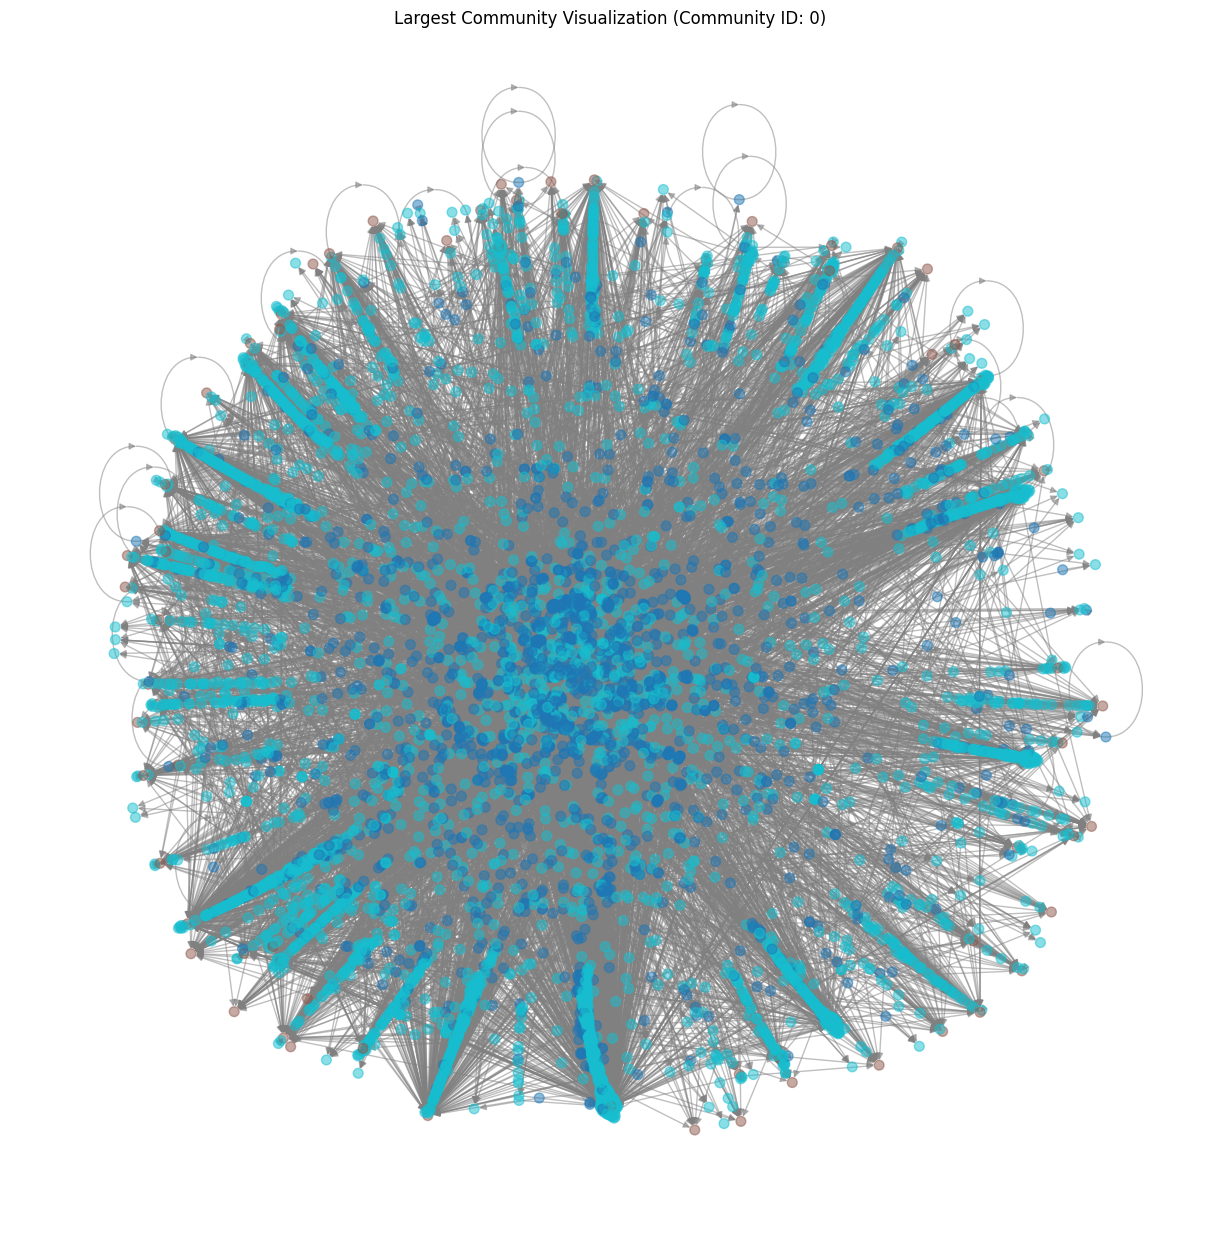

In [ ]:
# Replot the graph with customized settings for edge visibility

# Assuming `G_nx`, `df`, and `community_sizes` are already defined
# Get the largest community and its nodes
largest_community = community_sizes.idxmax()
largest_nodes = df[df['community'] == largest_community]['node']
subgraph = G_nx.subgraph(largest_nodes)

# Extract roles and assign unique colors to each role
roles = [df[df['node'] == node]['attributes'].iloc[0]['role'] for node in subgraph.nodes()]
unique_roles = list(set(roles))
role_colors = {role: idx for idx, role in enumerate(unique_roles)}

node_colors = [role_colors[role] for role in roles]

# Generate positions for the layout
pos = nx.spring_layout(subgraph)

# Plot the graph with customized settings
plt.figure(figsize=(12, 12))  # Increase the size of the figure
nx.draw(
    subgraph, pos,
    node_color=node_colors,
    edge_color="gray",  # Set edges to a soft gray color
    alpha=0.5,  # Make edges more transparent
    with_labels=False,  # Remove node labels
    node_size=50,  # Reduce node size
    cmap=plt.cm.tab10  # Use a color map for differentiation
)
plt.title(f"Largest Community Visualization (Community ID: {largest_community})")
plt.show()
